# Project Part 1: Text Processing and Exploratory Data Analysis

You are provided with a document corpus, which is an e-commerce fashion products dataset.
You can see an example document in the appendix.

In [90]:
import pandas as pd
import json
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
FASHION_PRODUCTS_PATH = "../IRWA-2025-data/fashion_products_dataset.json"
df_fashion_products = pd.read_json(FASHION_PRODUCTS_PATH)
print(df_fashion_products.info())
display(df_fashion_products.head(3))
print(df_fashion_products.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28080 entries, 0 to 28079
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   _id              28080 non-null  object        
 1   actual_price     28080 non-null  object        
 2   average_rating   28080 non-null  object        
 3   brand            28080 non-null  object        
 4   category         28080 non-null  object        
 5   crawled_at       28080 non-null  datetime64[ns]
 6   description      28080 non-null  object        
 7   discount         28080 non-null  object        
 8   images           28080 non-null  object        
 9   out_of_stock     28080 non-null  bool          
 10  pid              28080 non-null  object        
 11  product_details  28080 non-null  object        
 12  seller           28080 non-null  object        
 13  selling_price    28080 non-null  object        
 14  sub_category     28080 non-null  objec

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Women Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...


(28080, 17)


In [3]:
VALIDATION_LABELS_PATH = "../IRWA-2025-data/validation_labels.csv"
df_validation_labels = pd.read_csv(VALIDATION_LABELS_PATH)
print(df_validation_labels.info())
display(df_validation_labels.head())
print(df_validation_labels.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     40 non-null     object
 1   pid       40 non-null     object
 2   query_id  40 non-null     int64 
 3   labels    40 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ KB
None


,title,pid,query_id,labels
0,Full Sleeve Printed Women Sweatshirt,SWSFFVKBCQG5FHPF,1,1
1,Full Sleeve Striped Women Sweatshirt,SWSFJY5ZFHQ7HXKW,1,0
2,Full Sleeve Printed Women Sweatshirt,SWSFUY89NHMZHZPX,1,1
3,Full Sleeve Graphic Print Women Sweatshirt,SWSFXQ5YX6RZKHP4,1,1
4,Full Sleeve Solid Women Sweatshirt,JCKFTZBC3DMCVYXH,1,0


(40, 4)


## PART 1: Data Preparation

1. As a first step, you must pre-process the documents. In particular, for the text fields (title,
description) you should:
- Removing stop words
- Tokenization
- Removing punctuation marks
- Stemming
- and... anything else you think it's needed (bonus point)

In [4]:
def process_text(line: str) -> list[str]:
    """
    Preprocess a text removing stop words, stemming,
    transforming in lowercase and return the tokens of the text.

    Parameters:
        line (str): Text to be preprocessed.

    Returns:
        list[str]: Tokens corresponding to the input text after preprocessing.
    """

    stemmer = PorterStemmer()
    stop_words = set(stopwords.words("english"))
    line = line.lower()
    line = line.split(" ")
    line = [word for word in line if word not in stop_words]
    line = [stemmer.stem(word) for word in line]
    return line

In [46]:
# WARNING: These lines are computationally expensive. Expected time: 2 minutes.
df_fashion_products_01 = df_fashion_products.copy()
df_fashion_products_01['title'] = df_fashion_products["title"].apply(process_text).apply(" ".join)
df_fashion_products_01['description'] = df_fashion_products["description"].apply(process_text).apply(" ".join)

display(df_fashion_products_01.head(3))

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,yorker trackpant made 100% rich comb cotton gi...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,solid women multicolor track pant,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,yorker trackpant made 100% rich comb cotton gi...,66% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,solid men blue track pant,https://www.flipkart.com/yorker-solid-men-blue...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,yorker trackpant made 100% rich comb cotton gi...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,solid men multicolor track pant,https://www.flipkart.com/yorker-solid-men-mult...


2. Take into account that for future queries, the final output must return (when present) the 
following information for each of the selected documents:  
pid, title, description,  brand,  category, sub_category, product_details, seller, out_of_stock, 
selling_price, discount, actual_price, average_rating, url

In [52]:
selected_attributes = [
    "pid", "title", "description",  "brand",  "category", "sub_category", "product_details", 
    "seller", "out_of_stock", "selling_price", "discount", "actual_price", "average_rating", "url"
]

df_fashion_products_03 = df_fashion_products_01.copy()
df_fashion_products_03 = df_fashion_products_03[selected_attributes]

display(df_fashion_products_03.head(3))

,pid,title,description,brand,category,sub_category,product_details,seller,out_of_stock,selling_price,discount,actual_price,average_rating,url
0,TKPFCZ9EA7H5FYZH,solid women multicolor track pant,yorker trackpant made 100% rich comb cotton gi...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,False,921,69% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...
1,TKPFCZ9EJZV2UVRZ,solid men blue track pant,yorker trackpant made 100% rich comb cotton gi...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,False,499,66% off,"1,499",3.9,https://www.flipkart.com/yorker-solid-men-blue...
2,TKPFCZ9EHFCY5Z4Y,solid men multicolor track pant,yorker trackpant made 100% rich comb cotton gi...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,False,931,68% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...


3. Decide how to handle the fields category, sub_category, brand, product_details, and seller 
during pre-processing. Should they be merged into a single text field, indexed as separate fields 
in the inverted index or any other alternative? Justify your choice, considering how their 
distinctiveness may affect retrieval effectiveness. What are pros and cons of each approach?

Conservamos los campos nombrados por separado y procesados, y también un campo auxiliar `extra_field` que concatenan estos cinco para mejorar el resultado de las consultas.
La razón es porque entre los cinco campos no tienen el mismo peso por consulta, `sub_category` y `product_details` más relevantes que `seller`, o `brand` da una dimensión útil a la búsqueda por marca.

- En un solo campo: Juntar los campos en uno solo, de lo simple que es olvida la distinción entre palabras, dando el mismo peso a todas ellas.
- En campos separados: Mantenerlos por separado es más ordenado y permite dar un mayor contexto a las consultas según cada campo.

Creamos `extra_field`:

In [53]:
def flatten_details(details: list[dict]) -> dict:
    """
    Converts a list of dictionariess [{a:1}, {b:2}] to a unique dictionary {a:1, b:2}.
    
    Parameters:
        details (list[dict]): A list containing atomic dictionaries.

    Returns:
        dict: A merged dict.
    """
    if not isinstance(details, list):
        return {}
    merged = {}
    for detail in details:
        if isinstance(detail, dict):
            merged.update(detail)
    return merged

In [58]:
# WARNING. Expected duration: 30 s.
product_details_df = df_fashion_products_03["product_details"].apply(flatten_details).apply(pd.Series)
product_details_df.columns = ['prod_det_' + col for col in product_details_df.columns]

product_details_df["merged_product_details"] = product_details_df.astype(str).apply(" ".join, axis=1)

df_fashion_products_05 = pd.concat([df_fashion_products_03, product_details_df], axis=1)
df_fashion_products_05 = df_fashion_products_05.drop("product_details", axis=1)

In [60]:
extra_fields = ["title", "description", "category", "sub_category", "brand", "seller", "merged_product_details"]

df_fashion_products_06 = df_fashion_products_05.copy()
df_fashion_products_06["extra_field"] = df_fashion_products_05[extra_fields].apply(" ".join, axis=1)
df_fashion_products_06 = df_fashion_products_06.drop("merged_product_details", axis=1)

df_fashion_products_06.head(3)

,pid,title,description,brand,category,sub_category,seller,out_of_stock,selling_price,discount,...,prod_det_Brand,prod_det_Model Number,prod_det_Shade,prod_det_Thumb Hole,prod_det_Length,prod_det_Strap Material,prod_det_Weave type,prod_det_Fabric care,prod_det_Coat Type,extra_field
0,TKPFCZ9EA7H5FYZH,solid women multicolor track pant,yorker trackpant made 100% rich comb cotton gi...,York,Clothing and Accessories,Bottomwear,Shyam Enterprises,False,921,69% off,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,solid women multicolor track pant yorker track...
1,TKPFCZ9EJZV2UVRZ,solid men blue track pant,yorker trackpant made 100% rich comb cotton gi...,York,Clothing and Accessories,Bottomwear,Shyam Enterprises,False,499,66% off,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,solid men blue track pant yorker trackpant mad...
2,TKPFCZ9EHFCY5Z4Y,solid men multicolor track pant,yorker trackpant made 100% rich comb cotton gi...,York,Clothing and Accessories,Bottomwear,Shyam Enterprises,False,931,68% off,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,solid men multicolor track pant yorker trackpa...


In [62]:
df_fashion_products_07 = df_fashion_products_06.copy()
df_fashion_products_07["extra_field"] = df_fashion_products_07["extra_field"].apply(process_text).apply(" ".join)

4. Consider the fields out_of_stock, selling_price, discount, actual_price, and average_rating. 
Decide how these should be handled during pre-processing to use in further search. Should 
they be indexed as textual terms?

No indexamos los campos numéricos como texto. Estos cinco campos no aportan información semántica sobre el producto, sino cuantitativa, útiles para filtrar u ordenar los resultados. Durante el **pre-processing** se convierten a formato numérico o booleano, pero no se incluyen en el campo `extra_field` ni en el índice invertido.

In [ ]:
 df_fashion_products_08 = df_fashion_products_07.copy()
 
 for col in ["selling_price", "discount", "actual_price", "average_rating"]:
    df_fashion_products_08["num_" + col] = pd.to_numeric(
        df_fashion_products_08[col].astype(str).str.replace(r"[^\d.]", "", regex=True)
    )

## PART 2: Exploratory Data Analysis  

When  working  with  data,  it  is  important to have a better understanding of the content and 
some statistics. Provide an exploratory data analysis to describe the dataset you are working on 
in  this  project  and  explain  the  decisions  made  for the analysis. For example, word counting 
distribution;  average  sentence  length;  vocabulary  size;  ranking  of  products  based  on  rating, 
price,  or discount;  top  sellers  and  brands;  out_of_stock  distribution;  word  clouds  for  the most 
frequent words, and entity recognition. Feel free to do the exploratory analysis and report your 
findings in the report.

In [ ]:
num_cols = ["selling_price", "discount",	"actual_price",	"average_rating"]
len(df_fashion_products_05) # numnber of rows

df_fashion_products_05[num_cols].describe().T # main statistics
df_fashion_products_05[num_cols].corr() # correlation
df_fashion_products_05[num_cols].hist(bins=30) # histogram
plt.show()

df["wc_title"] = df["title_clean"].str.split().str.len()
df["wc_description"]  = df["description_clean"].str.split().str.len()
df["wc_doc"] = (df["wc_title"] + df["wc_description"]).astype(int)

df[["wc_title", "wc_description", "wc_doc"]].describe().T
df[["wc_title", "wc_description", "wc_doc"]].hist(bins=30)
plt.show()

In [102]:
joined_title_descripted = df_fashion_products_06[["title", "description"]].apply(" ".join)

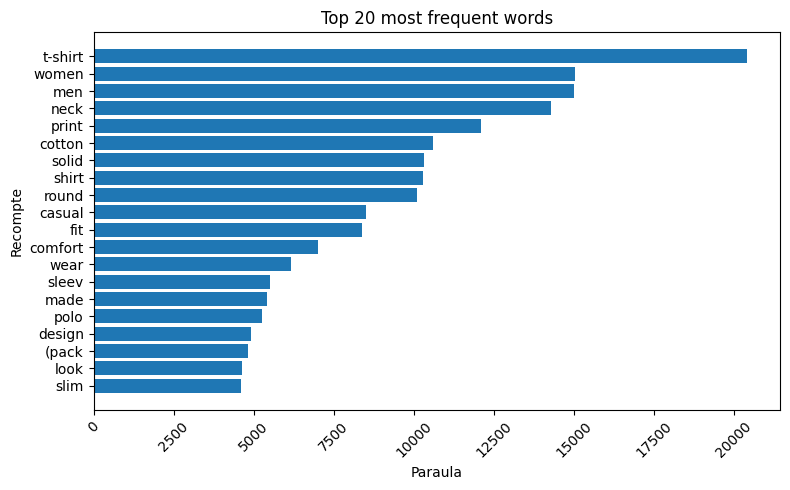

In [110]:
word_counts = {}

for text in joined_title_descripted.astype(str):
    for word in text.split():
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

word_freq_df = pd.DataFrame(list(word_counts.items()), columns=['word', 'count'])

N = 20
top_words = word_freq_df.sort_values('count', ascending=False).head(N)

plt.figure(figsize=(8, 5))
plt.barh(top_words['word'][::-1], top_words['count'][::-1])
plt.title(f'Top {N} most frequent words')
plt.xlabel('Paraula')
plt.ylabel('Recompte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

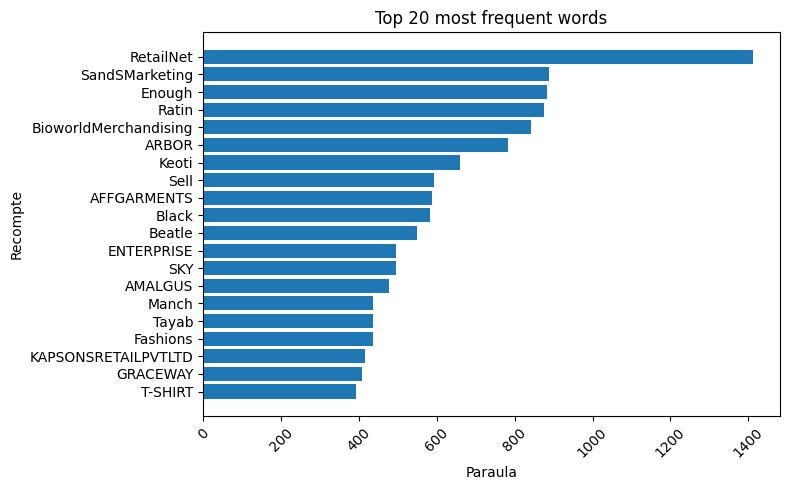

In [108]:
word_counts = {}

for text in df_fashion_products_06["seller"].astype(str):
    for word in text.split():
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

word_freq_df = pd.DataFrame(list(word_counts.items()), columns=['word', 'count'])

N = 20
top_words = word_freq_df.sort_values('count', ascending=False).head(N)

plt.figure(figsize=(8, 5))
plt.barh(top_words['word'][::-1], top_words['count'][::-1])
plt.title(f'Top {N} most frequent words')
plt.xlabel('Paraula')
plt.ylabel('Recompte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

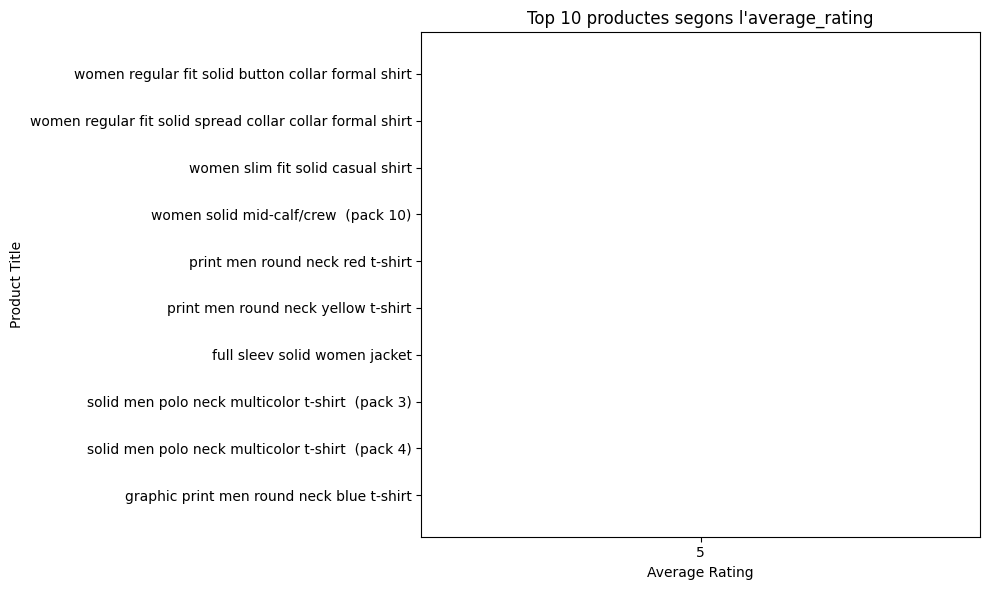

In [106]:
N = 10
top_titles = df_fashion_products_06.sort_values("average_rating", ascending=False).head(N)

plt.figure(figsize=(10, 6))
plt.barh(top_titles["title"][::-1], top_titles["average_rating"][::-1])
plt.title(f"Top {N} productes segons l'average_rating")
plt.xlabel("Average Rating")
plt.ylabel("Product Title")
plt.tight_layout()
plt.show()

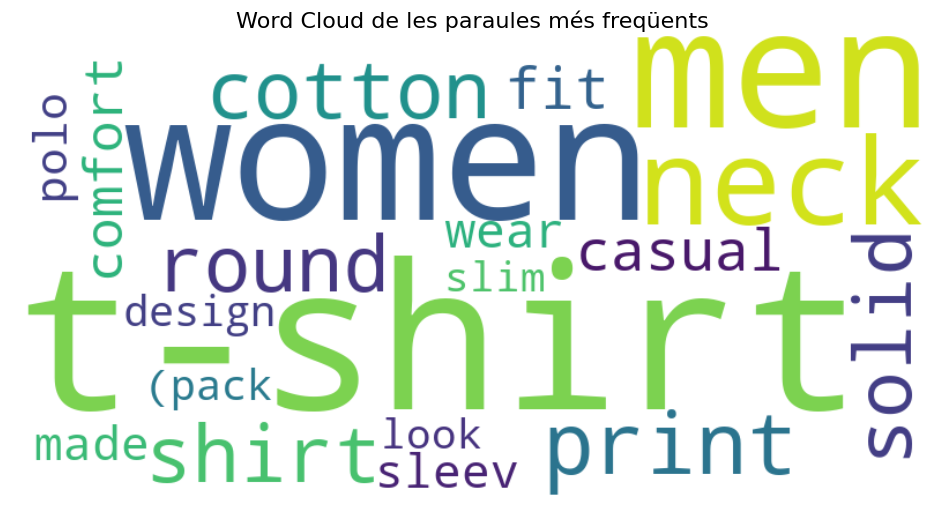

In [111]:
from wordcloud import WordCloud

word_freq = dict(zip(top_words['word'][::-1], top_words['count'][::-1]))

# Generem el word cloud
wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',   # Pots provar: 'plasma', 'inferno', 'cool', etc.
    max_words=200
).generate_from_frequencies(word_freq)

# Mostrem el resultat
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud de les paraules més freqüents", fontsize=16)
plt.show()